[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/marianapinedar-bit/UDEA-ai4eng-20252/blob/main/01%20-%20exploraci%C3%B3n.ipynb)

##**Análisis exploratorio de los datos train.csv**

Importamos las librerías necesarias:

In [66]:
import pandas as pd #Manejo y análisis de datos
import os   #Interactuar con variables de entorno
import matplotlib.pyplot as plt #Realizar gráficos
import numpy as np #Cálculos numéricos
import seaborn as sns #Graficos estadísticos

##**Cargar datos**
Para empezar con la carga de los datos (train.csv) primero debemos subir el archivo kaggle.json (API)

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = "."  #Se establece la variable de entorno al directorio actual

In [3]:
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia  #Se bajan los ficheros de la competencia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.28GB/s]


In [4]:
!unzip udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip #Se descomprime el fichero

Archive:  udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [5]:
train = pd.read_csv('train.csv')  #Carga de datos train.csv

In [6]:
train.head() #Devuelve las primeras 5 filas

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [7]:
train.describe()   #Resumen estadístico de las variables cuantitativas

,ID,PERIODO_ACADEMICO,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
count,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000
mean,494606.130576,20198.366679,0.268629,0.259996,0.262087,0.262903
std,285585.209455,10.535037,0.122130,0.093480,0.058862,0.067944
min,1.000000,20183.000000,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,20195.000000,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,20195.000000,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,20203.000000,0.314000,0.309000,0.293000,0.303000
max,989286.000000,20213.000000,0.657000,0.487000,0.320000,0.332000


In [8]:
train.describe(include='object')  #Resumen de variables categóricas

,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
count,692500,692500,686213,661643,660363,665871,669322,652727,648877,692500,686002,654397,665871,668836,692500
unique,948,31,8,5,7,2,12,2,2,2,2,2,2,12,4
top,DERECHO,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
freq,53244,282159,204048,249352,232671,592514,128289,563390,412606,692466,382201,597670,592514,141744,175619


In [9]:
train.info()    #Resumen técnico de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

In [10]:
train.E_PRGM_ACADEMICO.value_counts()   #Observamos el número de estudiantes por programas acádemicos

,count
E_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
...,...
DEPORTE Y ACTIVIDADA FISICA,1
QUIMICA Y FARMACIA,1
"LICENCIATURA EN EDUCACON FISICA, RECREACION Y DEPORTES",1


In [11]:
train.PERIODO_ACADEMICO.value_counts() #Numero de estudiantes por periodo académico

,count
PERIODO_ACADEMICO,
20195,180873
20203,171838
20212,171412
20183,164818
20194,1472
20213,1178
20202,490
20184,254
20196,165


##**Graficos**

#####Grafico de barras - Número de estudiantes según el rendimiento global

Resumen del rendimiento académico: RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


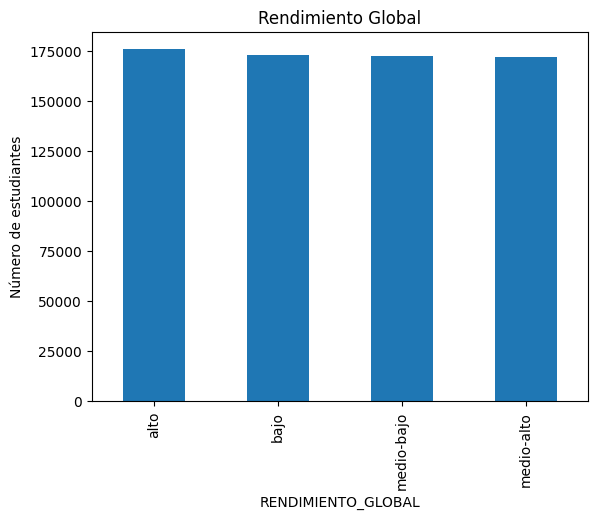

In [29]:
#Contar cuantos estudiantes hay por categoría
Rendimiento = train["RENDIMIENTO_GLOBAL"].value_counts()

#Imprimir el resumen de los conteos
print("Resumen del rendimiento académico:",Rendimiento)

#Grafico de barras
Rendimiento.plot(kind="bar")
plt.title("Rendimiento Global")
plt.ylabel("Número de estudiantes")
plt.show()

#####Grafico de barras - Número de estudiantes según el departamento

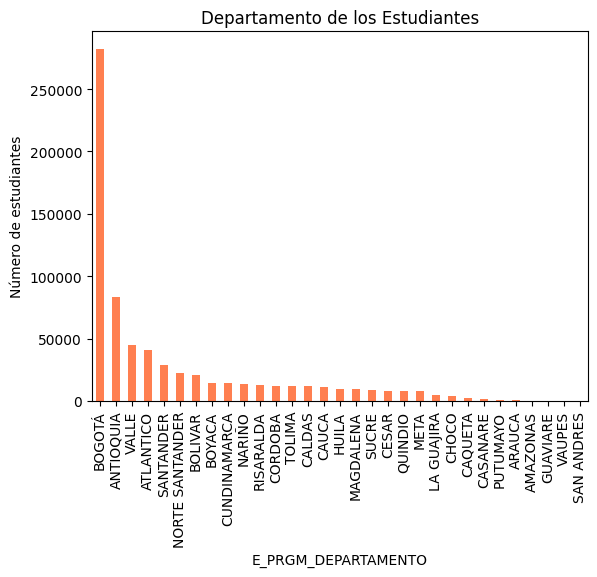

In [31]:
#Contar cuantos estudiantes hay por cada departamento
train["E_PRGM_DEPARTAMENTO"].value_counts().plot(kind="bar", color="coral")

#Graficar en barras
plt.title("Departamento de los Estudiantes")
plt.ylabel("Número de estudiantes")
plt.show()

####Gráficos circulares para el acceso a internet, automóvil, lavadora y computador

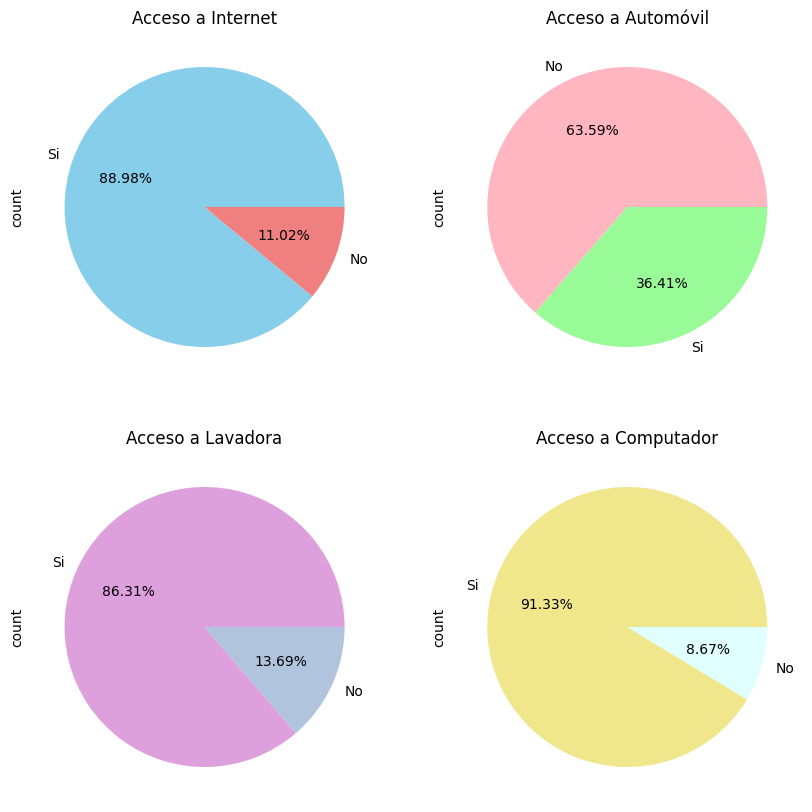

In [68]:
#Crear los ejes y las figuras, 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

#Grafico 1: Acceso a Internet
#Contar el numero de estudiantes que tiene y no tiene acceso a internet
train["F_TIENEINTERNET"].value_counts().plot(
    kind="pie", autopct="%1.2f%%", ax=axes[0,0],
    colors=["skyblue", "lightcoral"]
)
axes[0,0].set_title("Acceso a Internet")

#Grafico 2: Acceso a Automóvil
#Contar el numero de estudiantes que tiene y no tiene acceso a automóvil
train["F_TIENEAUTOMOVIL"].value_counts().plot(
    kind="pie", autopct="%1.2f%%", ax=axes[0,1],
    colors=["lightpink", "palegreen"]
)
axes[0,1].set_title("Acceso a Automóvil")

#Grafico 3: Acceso a Lavadora
#Contar el numero de estudiantes que tiene y no tiene acceso a lavadora
train["F_TIENELAVADORA"].value_counts().plot(
    kind="pie", autopct="%1.2f%%", ax=axes[1,0],
    colors=["plum", "lightsteelblue"]
)
axes[1,0].set_title("Acceso a Lavadora")

#Grafico 4: Acceso a Computador
#Contar el numero de estudiantes que tiene y no tiene acceso a computador
train["F_TIENECOMPUTADOR"].value_counts().plot(
    kind="pie", autopct="%1.2f%%", ax=axes[1,1],
    colors=["khaki", "lightcyan"]
)
axes[1,1].set_title("Acceso a Computador")

plt.show()

####Gráfico de barras agrupadas del rendimiento global según las horas trabajadas

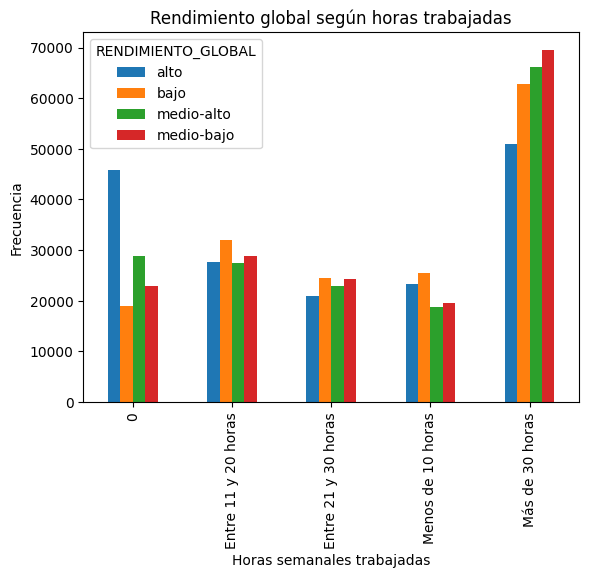

In [69]:
#Crear una tabla cruzada entre las horas trabajadas y el rendimiento global
pd.crosstab(train["E_HORASSEMANATRABAJA"], train["RENDIMIENTO_GLOBAL"]).plot.bar()

#Grafico
plt.xlabel("Horas semanales trabajadas")
plt.ylabel("Frecuencia")
plt.title("Rendimiento global según horas trabajadas")
plt.show()


####Gráfico de barras agrupadas del rendimiento global según el valor de la matrícula universitaria

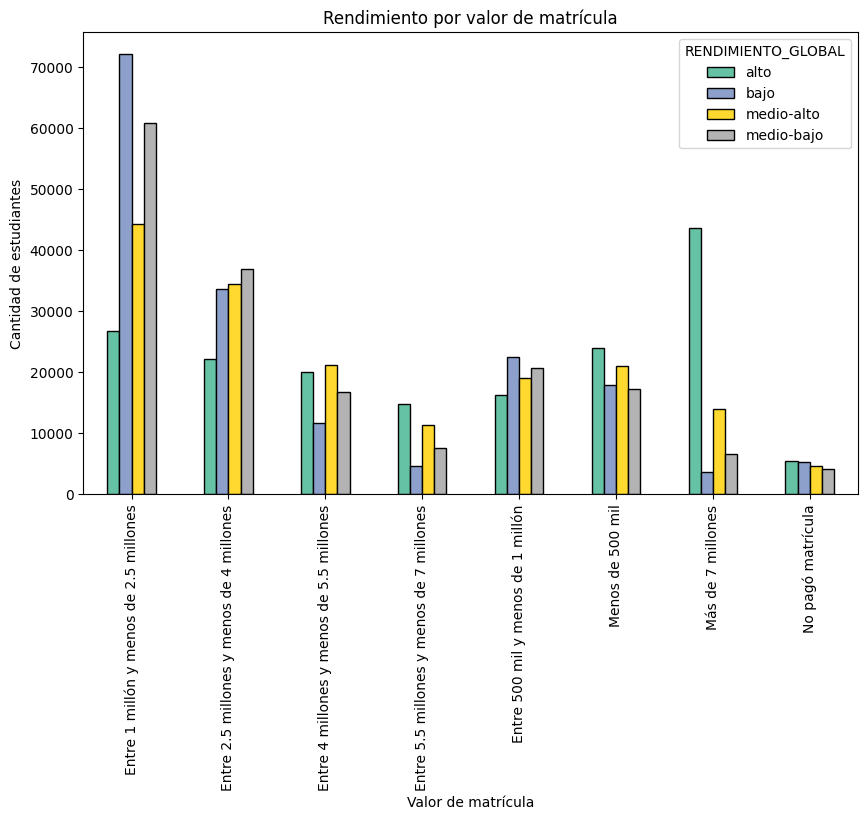

In [75]:
#Tabla cruzada entre el valor de la matrícula universitaria y el rendimiento global
pd.crosstab(train["E_VALORMATRICULAUNIVERSIDAD"], train["RENDIMIENTO_GLOBAL"])\
  .plot(kind="bar", figsize=(10,6), colormap="Set2", edgecolor="black")

#Gráfico
plt.title("Rendimiento por valor de matrícula")
plt.xlabel("Valor de matrícula")
plt.ylabel("Cantidad de estudiantes")
plt.show()

####Gráfico de barras del número de estudiantes por recurso en el hogar

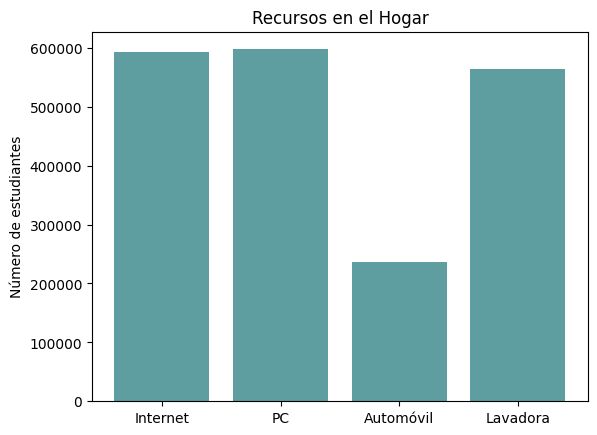

In [49]:
#Contamos la cantidad de "Si" por cada recurso
recursos = {
    #Sí para el acceso a internet
    "Internet": train["F_TIENEINTERNET"].value_counts().get("Si",0),
    #Sí para el acceso a computador
    "PC": train["F_TIENECOMPUTADOR"].value_counts().get("Si",0),
     #Sí para el acceso a automóvil
    "Automóvil": train["F_TIENEAUTOMOVIL"].value_counts().get("Si",0),
     #Sí para el acceso a lavadora
    "Lavadora": train["F_TIENELAVADORA"].value_counts().get("Si",0),
}

#Lista de los nombres de los recursos
recursos_list = list(recursos.keys())

#Lista de los conteos
conteos = list(recursos.values())

#Gráfico
plt.bar(recursos_list, conteos, color="cadetblue")
plt.title("Recursos en el Hogar")
plt.ylabel("Número de estudiantes")
plt.show()

###Gráfico de líneas del número de estudiantes según su valor de matrícula y rendimiento

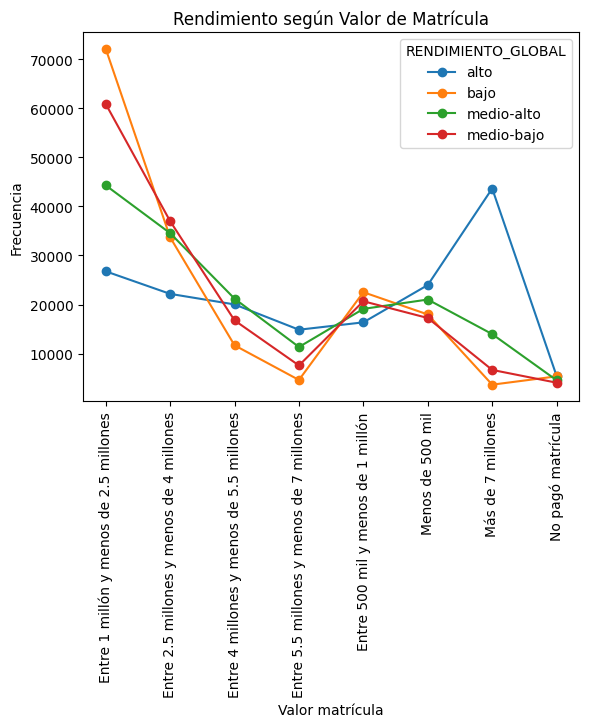

In [76]:
#Crear tabla que cruza el valor de matrícula con rendimiento del estudiante y graficar por medio de líneas
pd.crosstab(train["E_VALORMATRICULAUNIVERSIDAD"], train["RENDIMIENTO_GLOBAL"]).plot(kind="line", marker="o")

#Título y etiquetas
plt.title("Rendimiento según Valor de Matrícula")
plt.xlabel("Valor matrícula")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)

plt.show()

###Gráfico de líneas del número de estudiantes según su rendimiento académico y estrato de vivienda

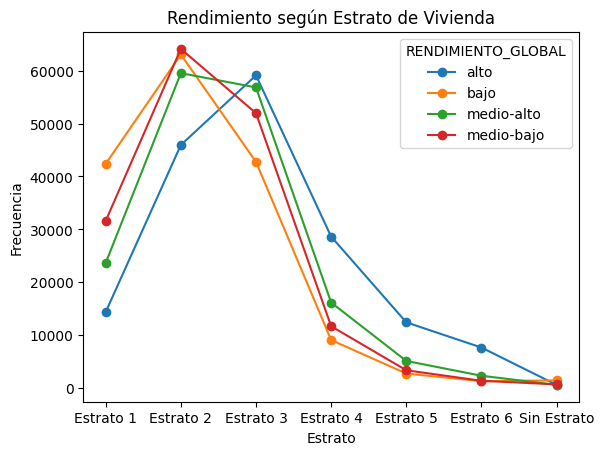

In [77]:
#Crear tabla que cruza estrato con rendimiento del estudiante y graficar por medio de líneas
pd.crosstab(train["F_ESTRATOVIVIENDA"], train["RENDIMIENTO_GLOBAL"]).plot(kind="line", marker="o")

#Título y etiquetas
plt.title("Rendimiento según Estrato de Vivienda")
plt.xlabel("Estrato")
plt.ylabel("Frecuencia")

plt.show()

###Gráfico de barras del número de estudiantes según su rendimiento académico y nivel educativo del padre

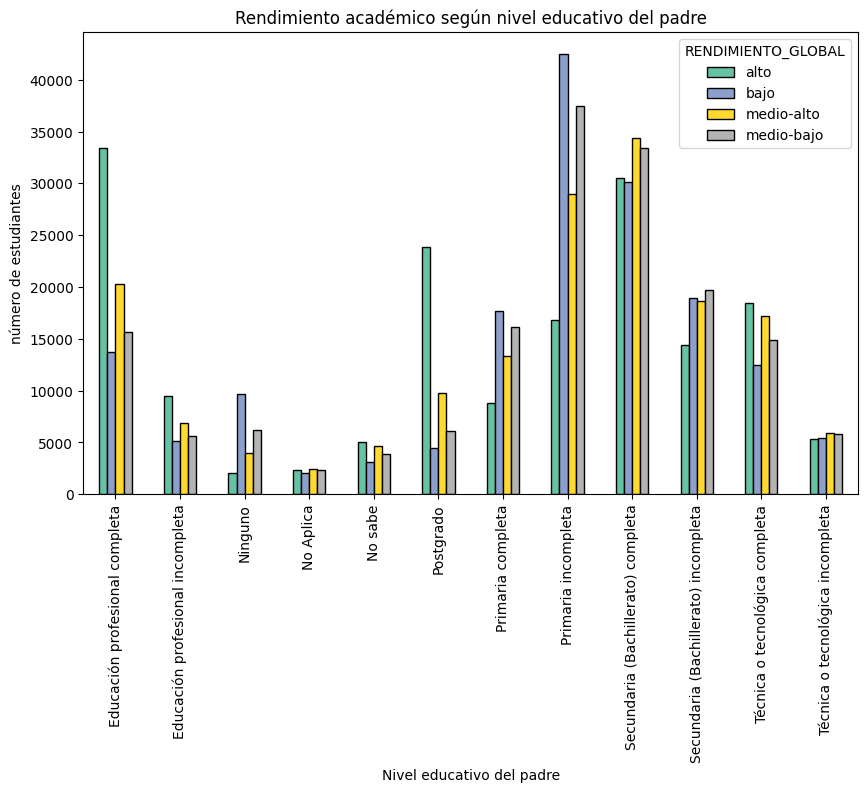

In [78]:
#Crear tabla que cruza el nivel educativo del padre con el rendimiento del estudiante
pd.crosstab(train["F_EDUCACIONPADRE"], train["RENDIMIENTO_GLOBAL"]).plot(kind="bar", figsize=(10,6), colormap="Set2", edgecolor="black")

#Titulos y etiqueta
plt.title("Rendimiento académico según nivel educativo del padre")
plt.xlabel("Nivel educativo del padre")
plt.ylabel("número de estudiantes")

plt.show()

###Gráfico de barras del número de estudiantes según su rendimiento académico y nivel educativo de la madre

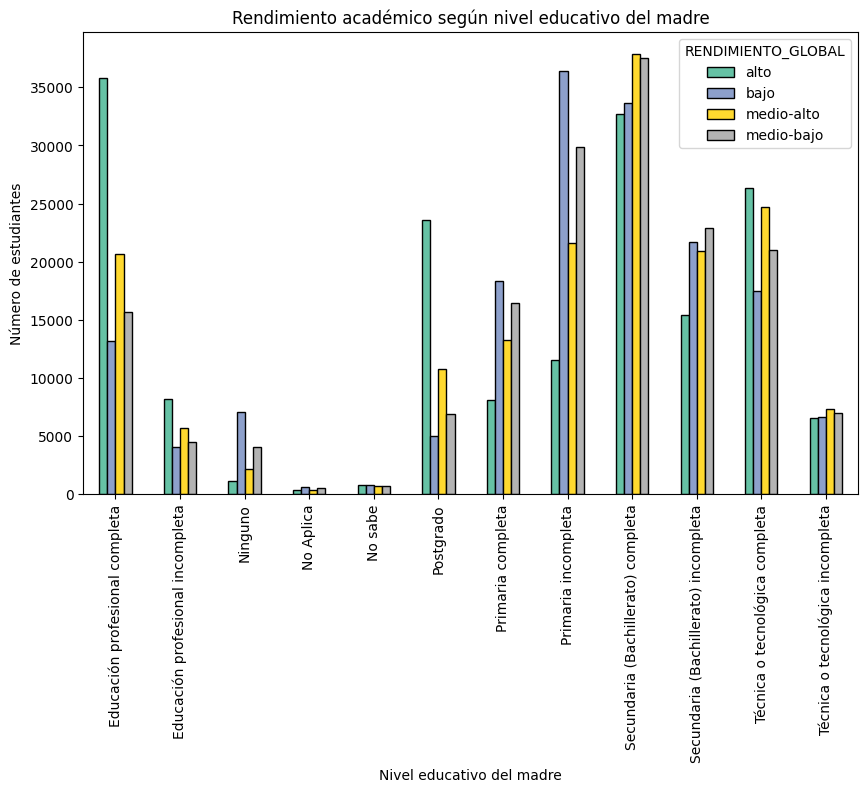

In [79]:
#Crear tabla que cruza el nivel educativo de la madre con el rendimiento del estudiante
pd.crosstab(train["F_EDUCACIONMADRE"], train["RENDIMIENTO_GLOBAL"]).plot(kind="bar",figsize=(10,6), colormap="Set2", edgecolor="black")

#Titulos etiquetas
plt.title("Rendimiento académico según nivel educativo del madre")
plt.xlabel("Nivel educativo del madre")
plt.ylabel("Número de estudiantes")

plt.show()

###Grafico de barras del número de estudiantes según su rendimiento académico y acceso a internet

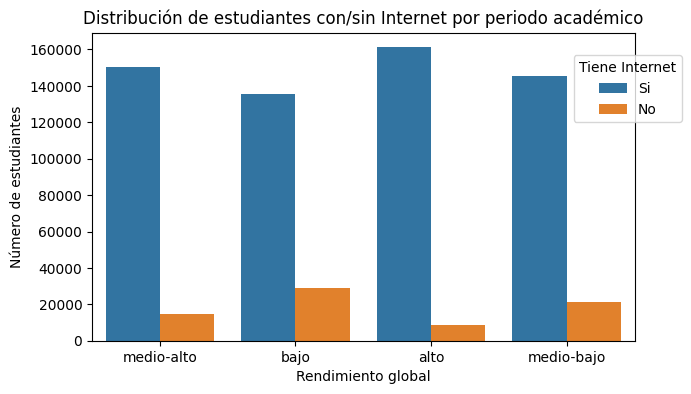

In [81]:
plt.figure(figsize=(7,4))

#Crear gráfico en el cual el eje x es el rendimiento y las barras de colores representan el acceso a internet
sns.countplot(data=train,
              x="RENDIMIENTO_GLOBAL",
              hue="F_TIENEINTERNET")

#Titulo y etiquetas
plt.title("Distribución de estudiantes con/sin Internet por periodo académico")
plt.xlabel("Rendimiento global")
plt.ylabel("Número de estudiantes")
plt.legend(title="Tiene Internet", loc="upper right", bbox_to_anchor=(1.1,0.95))
plt.show()

###Grafico de barras que representa el top 10 de  programas académicos con   mayor número de estudiantes

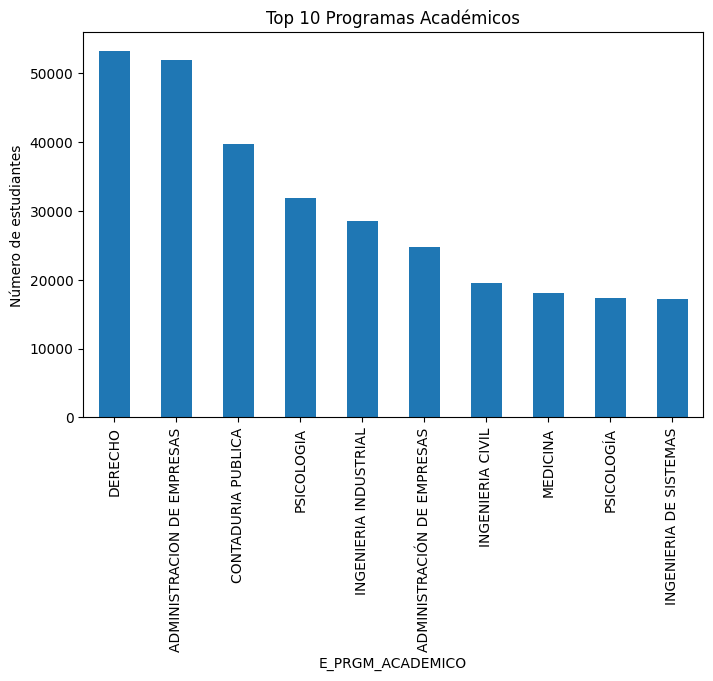

In [82]:
#Definir el tamaño del gráfico
plt.figure(figsize=(8,5))

#Contar los estudiantes por cada programa académico y graficar solo 10 más frecuentes
train["E_PRGM_ACADEMICO"].value_counts().head(10).plot(kind="bar")

#Título y etiqueta del eje y
plt.title("Top 10 Programas Académicos")
plt.ylabel("Número de estudiantes")

plt.show()